## IMPORT PACKAGE 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.impute import SimpleImputer #subtitusi nilai

import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv("home.csv")
df.head(10)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50
5,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,6,102.83,101.59
6,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,7,103.07,102.00
7,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,8,103.24,102.23
8,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,9,102.91,102.11
9,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,10,103.17,102.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    99329 non-null  object 
 1   hpi_flavor  99329 non-null  object 
 2   frequency   99329 non-null  object 
 3   level       99329 non-null  object 
 4   place_name  99329 non-null  object 
 5   place_id    99329 non-null  object 
 6   yr          99329 non-null  int64  
 7   period      99329 non-null  int64  
 8   index_nsa   99327 non-null  float64
 9   index_sa    32138 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


In [5]:
df.describe()

,yr,period,index_nsa,index_sa
count,99329.000000,99329.000000,99327.000000,32138.000000
mean,2000.307695,2.611966,151.396814,167.189389
std,9.837402,1.431341,68.670234,55.467496
min,1975.000000,1.000000,18.310000,69.590000
25%,1993.000000,2.000000,103.440000,119.022500
50%,2001.000000,3.000000,140.930000,162.455000
75%,2008.000000,4.000000,184.920000,200.850000
max,2016.000000,12.000000,791.710000,502.450000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    99329 non-null  object 
 1   hpi_flavor  99329 non-null  object 
 2   frequency   99329 non-null  object 
 3   level       99329 non-null  object 
 4   place_name  99329 non-null  object 
 5   place_id    99329 non-null  object 
 6   yr          99329 non-null  int64  
 7   period      99329 non-null  int64  
 8   index_nsa   99327 non-null  float64
 9   index_sa    32138 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


In [7]:
df.isna().sum()

hpi_type          0
hpi_flavor        0
frequency         0
level             0
place_name        0
place_id          0
yr                0
period            0
index_nsa         2
index_sa      67191
dtype: int64

In [8]:
# deklarasi kelas simpleImputer
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')

In [9]:
df['index_nsa'] = imputer_median.fit_transform(df[['index_nsa']])
df['index_sa'] = imputer_mean.fit_transform(df[['index_sa']])

In [10]:
df.isna().sum()

hpi_type      0
hpi_flavor    0
frequency     0
level         0
place_name    0
place_id      0
yr            0
period        0
index_nsa     0
index_sa      0
dtype: int64

In [11]:
x = df.drop(['hpi_type', 'hpi_flavor','frequency', 'level', 'place_name', 'place_id'], axis=1)
y = df['place_name']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
x.head(10)

,yr,period,index_nsa,index_sa
0,1991,1,100.00,100.00
1,1991,2,101.03,101.11
2,1991,3,101.40,101.08
3,1991,4,101.79,101.10
4,1991,5,102.44,101.50
5,1991,6,102.83,101.59
6,1991,7,103.07,102.00
7,1991,8,103.24,102.23
8,1991,9,102.91,102.11
9,1991,10,103.17,102.51


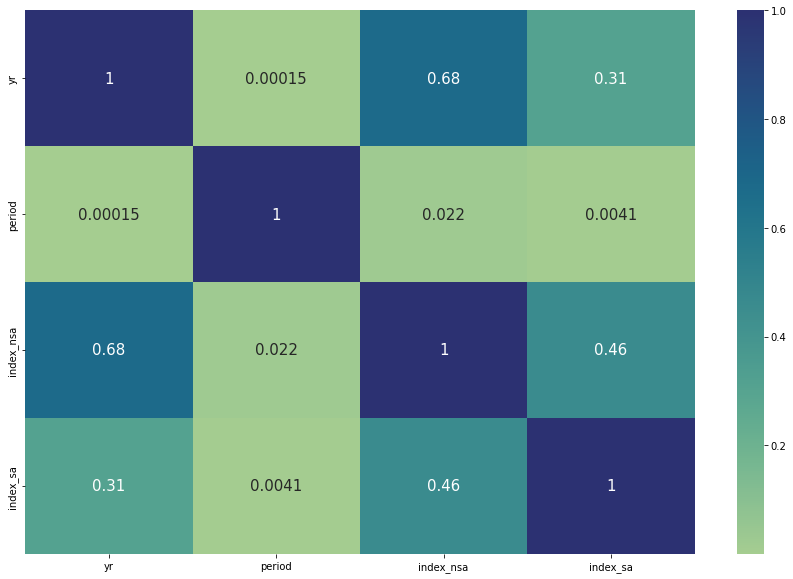

In [14]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='crest',annot=True,annot_kws={"size":15})
plt.show()

## Algoritma Supervised Learning
# 1. K-Nearest Neighbors (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
knn_pred = knn.predict(x_test)
print(knn_pred)

['Alaska' 'Canton-Massillon, OH' 'Atlanta-Sandy Springs-Roswell, GA' ...
 'Amarillo, TX' 'Oklahoma' 'Baton Rouge, LA']


In [18]:
print(classification_report(y_test, knn_pred))
acc_knn = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN dengan default paramater :", round(acc_knn,2))

                                                           precision    recall  f1-score   support

                                              Abilene, TX       0.01      0.03      0.01        39
                                                Akron, OH       0.01      0.02      0.01        90
                                                  Alabama       0.03      0.11      0.04       142
                                                   Alaska       0.03      0.12      0.05       137
                                               Albany, GA       0.00      0.00      0.00        28
                                               Albany, OR       0.00      0.00      0.00        26
                              Albany-Schenectady-Troy, NY       0.01      0.03      0.02        87
                                          Albuquerque, NM       0.00      0.00      0.00        69
                                           Alexandria, LA       0.00      0.00      0.00        37
         

### 2. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=9)

In [20]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [21]:
dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))
acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree dengan default paramater :", round(acc_dt,2))

                                                           precision    recall  f1-score   support

                                              Abilene, TX       0.00      0.00      0.00        39
                                                Akron, OH       0.00      0.00      0.00        90
                                                  Alabama       0.00      0.00      0.00       142
                                                   Alaska       0.03      0.14      0.06       137
                                               Albany, GA       0.00      0.18      0.00        28
                                               Albany, OR       0.00      0.00      0.00        26
                              Albany-Schenectady-Troy, NY       0.00      0.00      0.00        87
                                          Albuquerque, NM       0.00      0.00      0.00        69
                                           Alexandria, LA       0.00      0.00      0.00        37
         

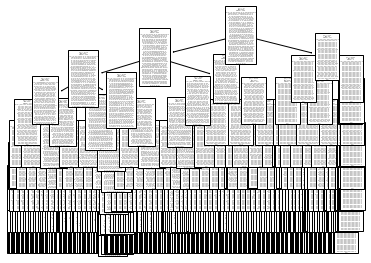

In [22]:
from sklearn import tree

tree.plot_tree(dt)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,3,4,5,6,7,8,9]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=9),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [24]:
print(grid.best_params_)

{'max_depth': 9}


## 3. Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [26]:
gnb.fit(x_train, y_train)

GaussianNB()

In [27]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [28]:
gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)

print("Gaussian NB : ")
print(classification_report(y_test, gnb_pred))
acc_gnb = accuracy_score(y_test, gnb_pred)
print("Akurasi algoritma Gaussian Naive Bayes dengan default paramater :", round(acc_gnb,2))

Gaussian NB : 
                                                           precision    recall  f1-score   support

                                              Abilene, TX       0.00      0.00      0.00        39
                                                Akron, OH       0.00      0.00      0.00        90
                                                  Alabama       0.00      0.00      0.00       142
                                                   Alaska       0.00      0.00      0.00       137
                                               Albany, GA       0.00      0.00      0.00        28
                                               Albany, OR       0.00      0.00      0.00        26
                              Albany-Schenectady-Troy, NY       0.00      0.00      0.00        87
                                          Albuquerque, NM       0.00      0.00      0.00        69
                                           Alexandria, LA       0.00      0.00      0.00     

In [29]:
print("Multinomial NB : ")
print(classification_report(y_test, mnb_pred))
acc_mnb = accuracy_score(y_test, mnb_pred)
print("Akurasi algoritma Multinomia Naive Bayes dengan default paramater :", round(acc_mnb,2))

Multinomial NB : 
                                                           precision    recall  f1-score   support

                                              Abilene, TX       0.00      0.00      0.00        39
                                                Akron, OH       0.00      0.00      0.00        90
                                                  Alabama       0.00      0.00      0.00       142
                                                   Alaska       0.00      0.00      0.00       137
                                               Albany, GA       0.00      0.00      0.00        28
                                               Albany, OR       0.00      0.00      0.00        26
                              Albany-Schenectady-Troy, NY       0.00      0.00      0.00        87
                                          Albuquerque, NM       0.00      0.00      0.00        69
                                           Alexandria, LA       0.00      0.00      0.00  

## 4. Suport Vector Machine (SVM)

In [30]:
# from sklearn.svm import SVC

# svm = SVC()

In [31]:
# svm.fit(x_train, y_train)

In [32]:
# svm_pred = svm.predict(x_test)
# print(classification_report(y_test, svm_pred))
# acc_svm = accuracy_score(y_test, svm_pred)
# print("Akurasi algoritma Super Vector Machine (SVM) dengan default paramater :", round(acc_svm,2))


## Membandingkan Algoritma

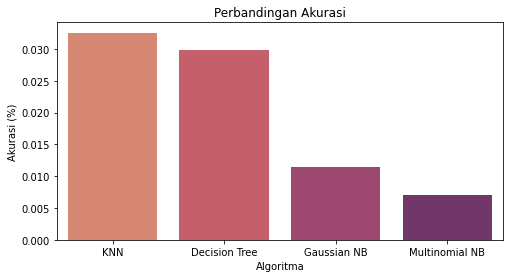

In [34]:
algoritma = ["KNN","Decision Tree","Gaussian NB","Multinomial NB"]
pred_value = [acc_knn,acc_dt,acc_gnb,acc_mnb]

plt.figure(figsize=(8,4))

sns.barplot(x= algoritma,y = pred_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## Regression

In [35]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [36]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    99329 non-null  object 
 1   hpi_flavor  99329 non-null  object 
 2   frequency   99329 non-null  object 
 3   level       99329 non-null  object 
 4   place_name  99329 non-null  object 
 5   place_id    99329 non-null  object 
 6   yr          99329 non-null  int64  
 7   period      99329 non-null  int64  
 8   index_nsa   99329 non-null  float64
 9   index_sa    99329 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


## Visualisasi Hasil prediksi Linear Regression

In [53]:
lg.fit(df[['index_nsa']], df.index_sa)

LinearRegression()

In [55]:
print(lg.predict([[1.1]]))

[135.30396117]


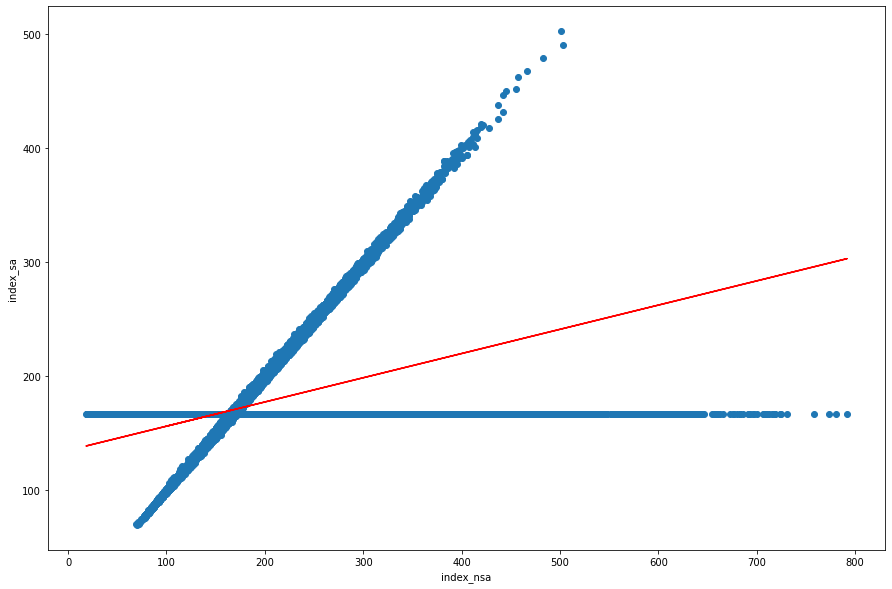

In [56]:
plt.figure(figsize=(15,10))
plt.xlabel('index_nsa')
plt.ylabel('index_sa')
plt.scatter(df[['index_nsa']], df.index_sa)
plt.plot(df[['index_nsa']], lg.predict(df[['index_nsa']]), color='red')
plt.show()